In [2]:
# Credit Author: @zomienciti (https://github.com/zomienciti)

In [4]:
# Import Library yang akan digunakan
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Referensi Project II

- https://github.com/topics/diabetes-prediction
- https://www.kaggle.com/code/nuozhou1/diabetes-classification-project
- https://www.kaggle.com/code/kredy10/simple-neural-network-for-diabetes-prediction
- https://www.kaggle.com/code/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed
- https://www.kaggle.com/code/ahmetcankaraolan/diabetes-prediction-using-machine-learning
- https://www.kaggle.com/competitions/diabetes-classification
- https://www.kaggle.com/datasets/mathchi/diabetes-data-set

https://www.youtube.com/watch?v=Rmj87U8noS8

https://towardsdatascience.com/violin-plots-explained-fb1d115e023d



In [5]:
# Import style
plt.style.use('seaborn')

## 1.) Business & Data Understanding

### Load Datasets

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')
os.chdir("../datasets/diabetes dataset//")

In [7]:
df_diabetes = pd.read_csv('pima-indians-diabetes.csv', names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])

## 2.) Data Cleaning & Analysis

In [8]:
# Ternyata datanya sudah clean guys :)
df_diabetes.isnull().sum()

preg_times        0
glucose           0
blood_press       0
skin_thickness    0
insulin           0
BMI               0
pedigree          0
age               0
class             0
dtype: int64

In [9]:
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   preg_times      768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   blood_press     768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   pedigree        768 non-null    float64
 7   age             768 non-null    int64  
 8   class           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
preg_times,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
blood_press,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
percent_missing = ((df_diabetes.isnull().sum()/df_diabetes.shape[0])*100)
num_values = len(df_diabetes) - df_diabetes.isnull().sum()
missing_df = pd.DataFrame({'Number of Values':num_values,
                           'Missing Percentage':percent_missing})
missing_df

,Number of Values,Missing Percentage
preg_times,768,0.0
glucose,768,0.0
blood_press,768,0.0
skin_thickness,768,0.0
insulin,768,0.0
BMI,768,0.0
pedigree,768,0.0
age,768,0.0
class,768,0.0


### Explore and Visualize Data

In [13]:
df_diabetes.columns

Index(['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin',
       'BMI', 'pedigree', 'age', 'class'],
      dtype='object')

In [14]:
print(f"Total Rows Data   : {df_diabetes.shape[0]}")
print(f"Total Column Data : {df_diabetes.shape[1]-1}")

Total Rows Data   : 768
Total Column Data : 8


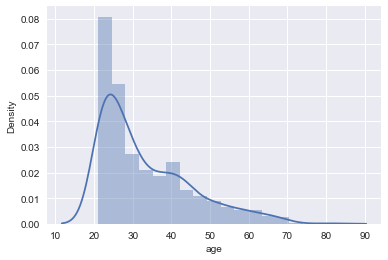

In [15]:
# Distribusi Plot berdasarkan usia
sns.distplot(df_diabetes["age"])
plt.show()

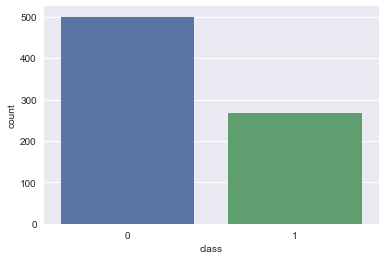

In [16]:
# Count a Class
sns.countplot(x='class', data=df_diabetes)
plt.show()

In [17]:
df_diabetes.columns

Index(['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin',
       'BMI', 'pedigree', 'age', 'class'],
      dtype='object')

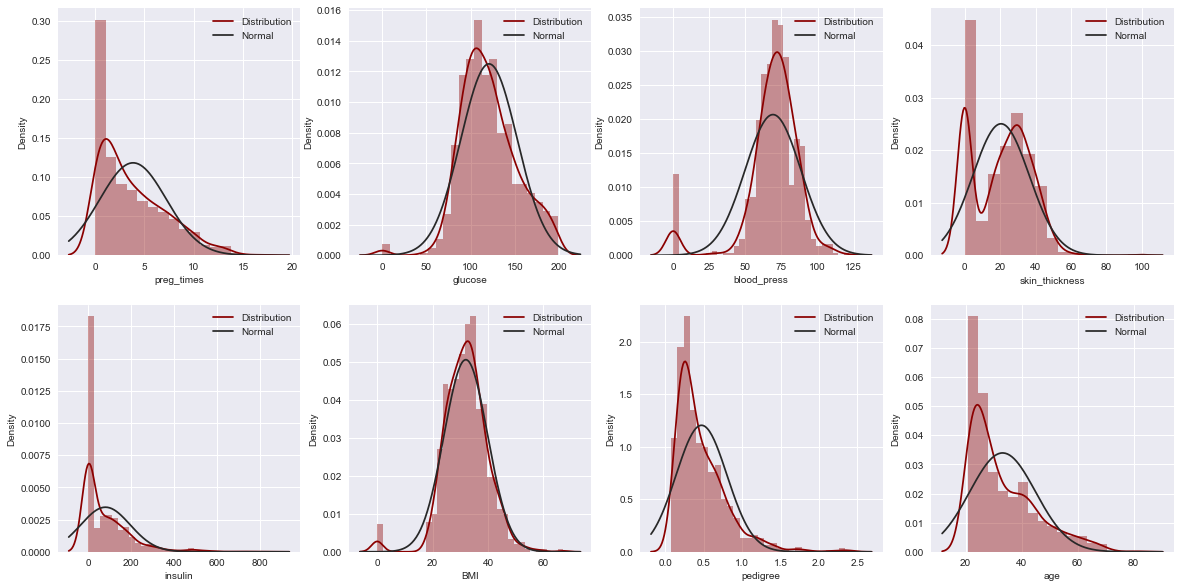

In [18]:
from scipy.stats import norm
f = ['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin',
       'BMI', 'pedigree', 'age']

nrows=2
ncolumns=4

# make a list of all dataframes

fig, axes = plt.subplots(nrows, ncolumns,figsize =(20,10))

# plot counter
count=0
for i in range(nrows):
    for j in range(ncolumns):
        mu,sig = norm.fit(df_diabetes[f[count]])
        g = sns.distplot(df_diabetes[f[count]],ax=axes[i,j],color='darkred',kde=True,fit = norm)
        g.legend(['Distribution','Normal'])
        count+=1

plt.show()

Dalam coding tersebut, kita tidak dapat langsung menyimpulkan bahwa distribusi data lebih banyak daripada distribusi normalnya hanya berdasarkan visualisasi histogram. Plot histogram dan kurva distribusi normal digunakan untuk membandingkan bentuk distribusi data aktual dengan distribusi normal yang diharapkan.

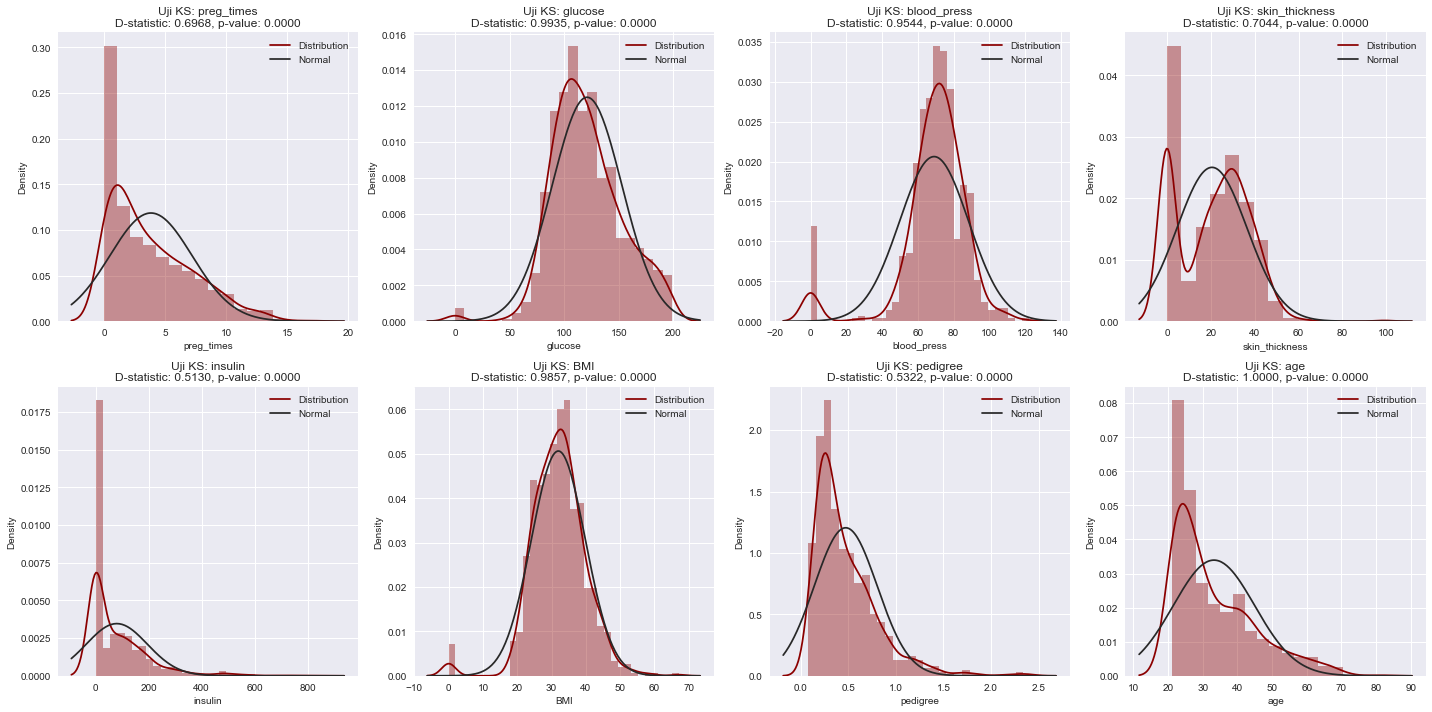

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest

# Daftar fitur
features = ['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age']

# Jumlah baris dan kolom subplot
nrows = 2
ncols = 4

# Ukuran plot
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))

# Counter plot
count = 0

# Loop untuk setiap fitur
for i in range(nrows):
    for j in range(ncols):
        # Mengambil data fitur
        data = df_diabetes[features[count]]

        # Melakukan uji Kolmogorov-Smirnov
        D, p_value = kstest(data, 'norm')

        # Menampilkan distribusi data dengan distplot
        sns.distplot(data, ax=axes[i, j], kde=True, fit=norm, color='darkred')

        # Menampilkan hasil uji
        axes[i, j].set_title(f'Uji KS: {features[count]}\nD-statistic: {D:.4f}, p-value: {p_value:.4f}')
        axes[i, j].legend(['Distribution', 'Normal'])

        count += 1

# Menampilkan plot
plt.tight_layout()
plt.show()


Dan ini hasil uji dengan model kolmogorov-smirnov.

Tidak selalu benar bahwa hasil distribusi lebih banyak daripada distribusi normal. Hasil distribusi yang diperoleh bergantung pada data yang digunakan dalam analisis. Jika data yang digunakan benar-benar terdistribusi secara normal, maka distribusi yang diperoleh akan lebih cocok dengan kurva distribusi normal.

Namun, jika data memiliki karakteristik yang berbeda, seperti kemiringan (skewness) atau ekor panjang, maka distribusi yang diperoleh mungkin tidak cocok dengan kurva distribusi normal. Dalam hal ini, distribusi yang ditemukan akan lebih banyak bervariasi atau berbeda dari distribusi normal.

Penting untuk melakukan analisis distribusi dan uji statistik seperti Kolmogorov-Smirnov untuk memahami karakteristik data yang sedang diamati. Jika distribusi data tidak sesuai dengan distribusi normal, maka dapat digunakan distribusi lain yang lebih sesuai untuk analisis yang akan dilakukan.

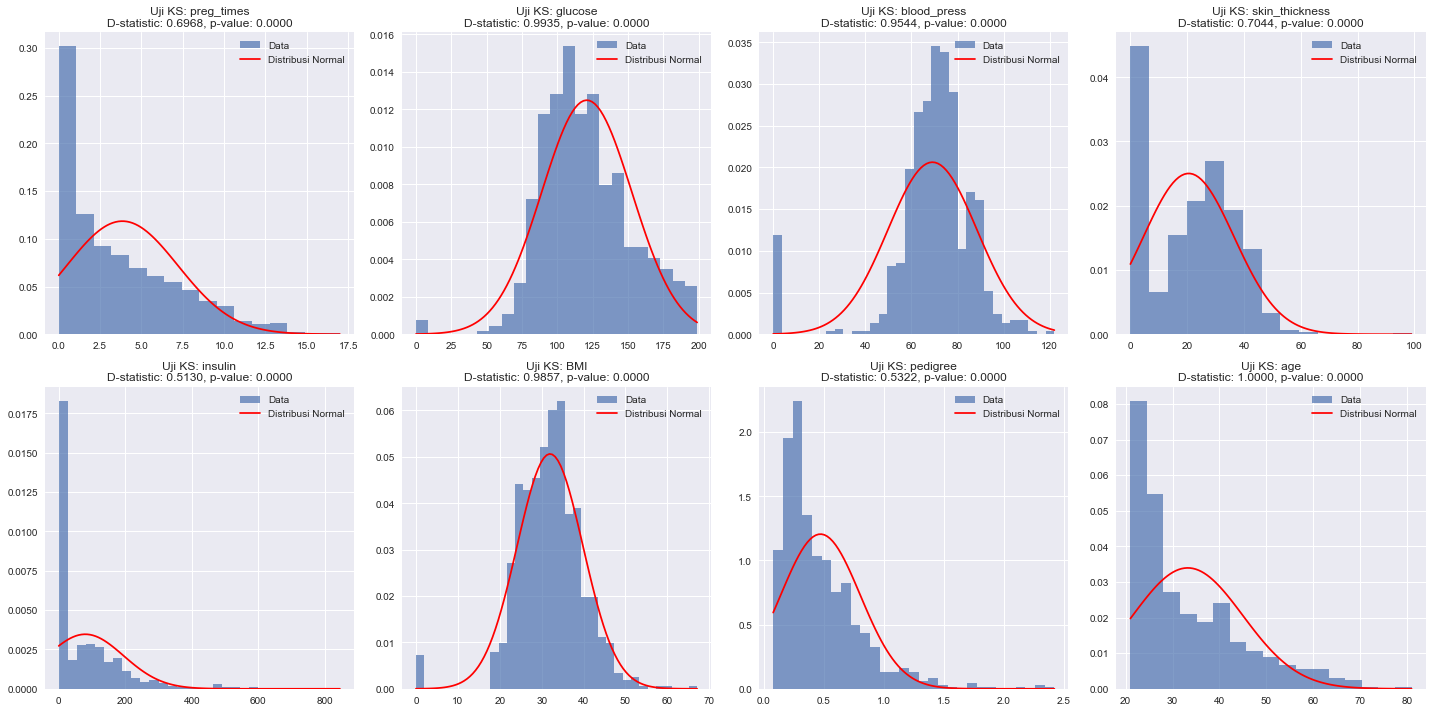

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest

# Daftar fitur
features = ['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age']

# Jumlah baris dan kolom subplot
nrows = 2
ncols = 4

# Ukuran plot
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))

# Counter plot
count = 0

# Loop untuk setiap fitur
for i in range(nrows):
    for j in range(ncols):
        # Mengambil data fitur
        data = df_diabetes[features[count]]

        # Melakukan uji Kolmogorov-Smirnov
        D, p_value = kstest(data, 'norm')

        # Menampilkan histogram data
        axes[i, j].hist(data, bins='auto', density=True, alpha=0.7, label='Data')

        # Menghasilkan kurva distribusi normal
        x = np.linspace(np.min(data), np.max(data), 100)
        y = np.exp(-(x - np.mean(data))**2 / (2 * np.var(data))) / np.sqrt(2 * np.pi * np.var(data))
        axes[i, j].plot(x, y, 'r', label='Distribusi Normal')

        # Menampilkan hasil uji
        axes[i, j].set_title(f'Uji KS: {features[count]}\nD-statistic: {D:.4f}, p-value: {p_value:.4f}')
        axes[i, j].legend()

        count += 1

# Menampilkan plot
plt.tight_layout()
plt.show()


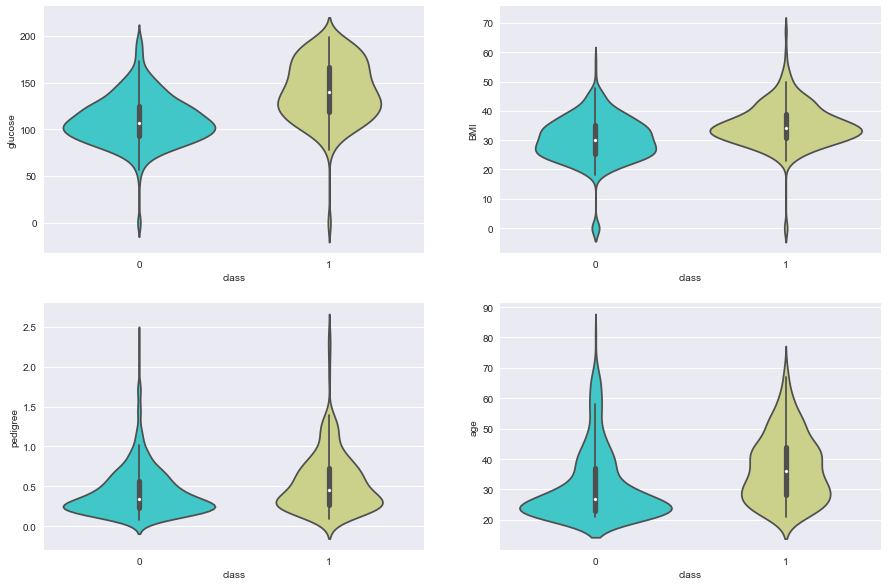

In [21]:
f = ['glucose','BMI', 'pedigree', 'age']
nrows=2
ncolumns=2

# make a list of all dataframes

fig, axes = plt.subplots(nrows, ncolumns,figsize =(15,10))

# plot counter
count=0
for i in range(nrows):
    for j in range(ncolumns):
        sns.violinplot(data =df_diabetes, x = 'class',y=f[count],palette = 'rainbow',ax=axes[i,j])
        count+=1

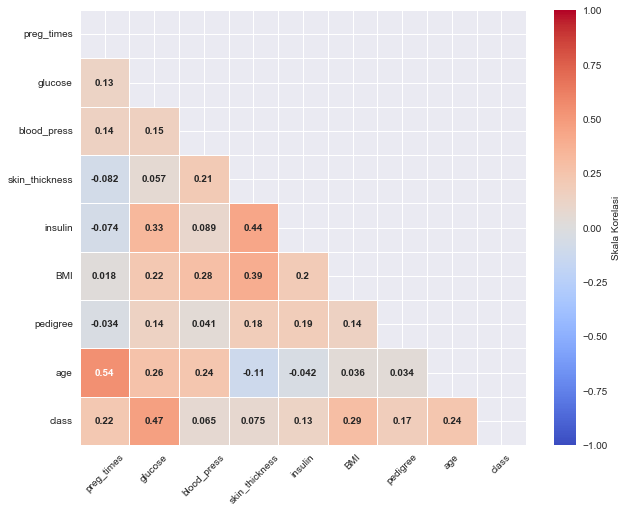

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(df_diabetes.corr()))
sns.heatmap(df_diabetes.corr(), annot=True, mask=mask, cmap='coolwarm', linewidths=0.5, cbar=True, cbar_kws={'label': 'Skala Korelasi'},annot_kws={'fontsize': 10, 'weight': 'bold'}, vmin=-1, vmax=1)
plt.xticks(rotation = 45)
plt.show()

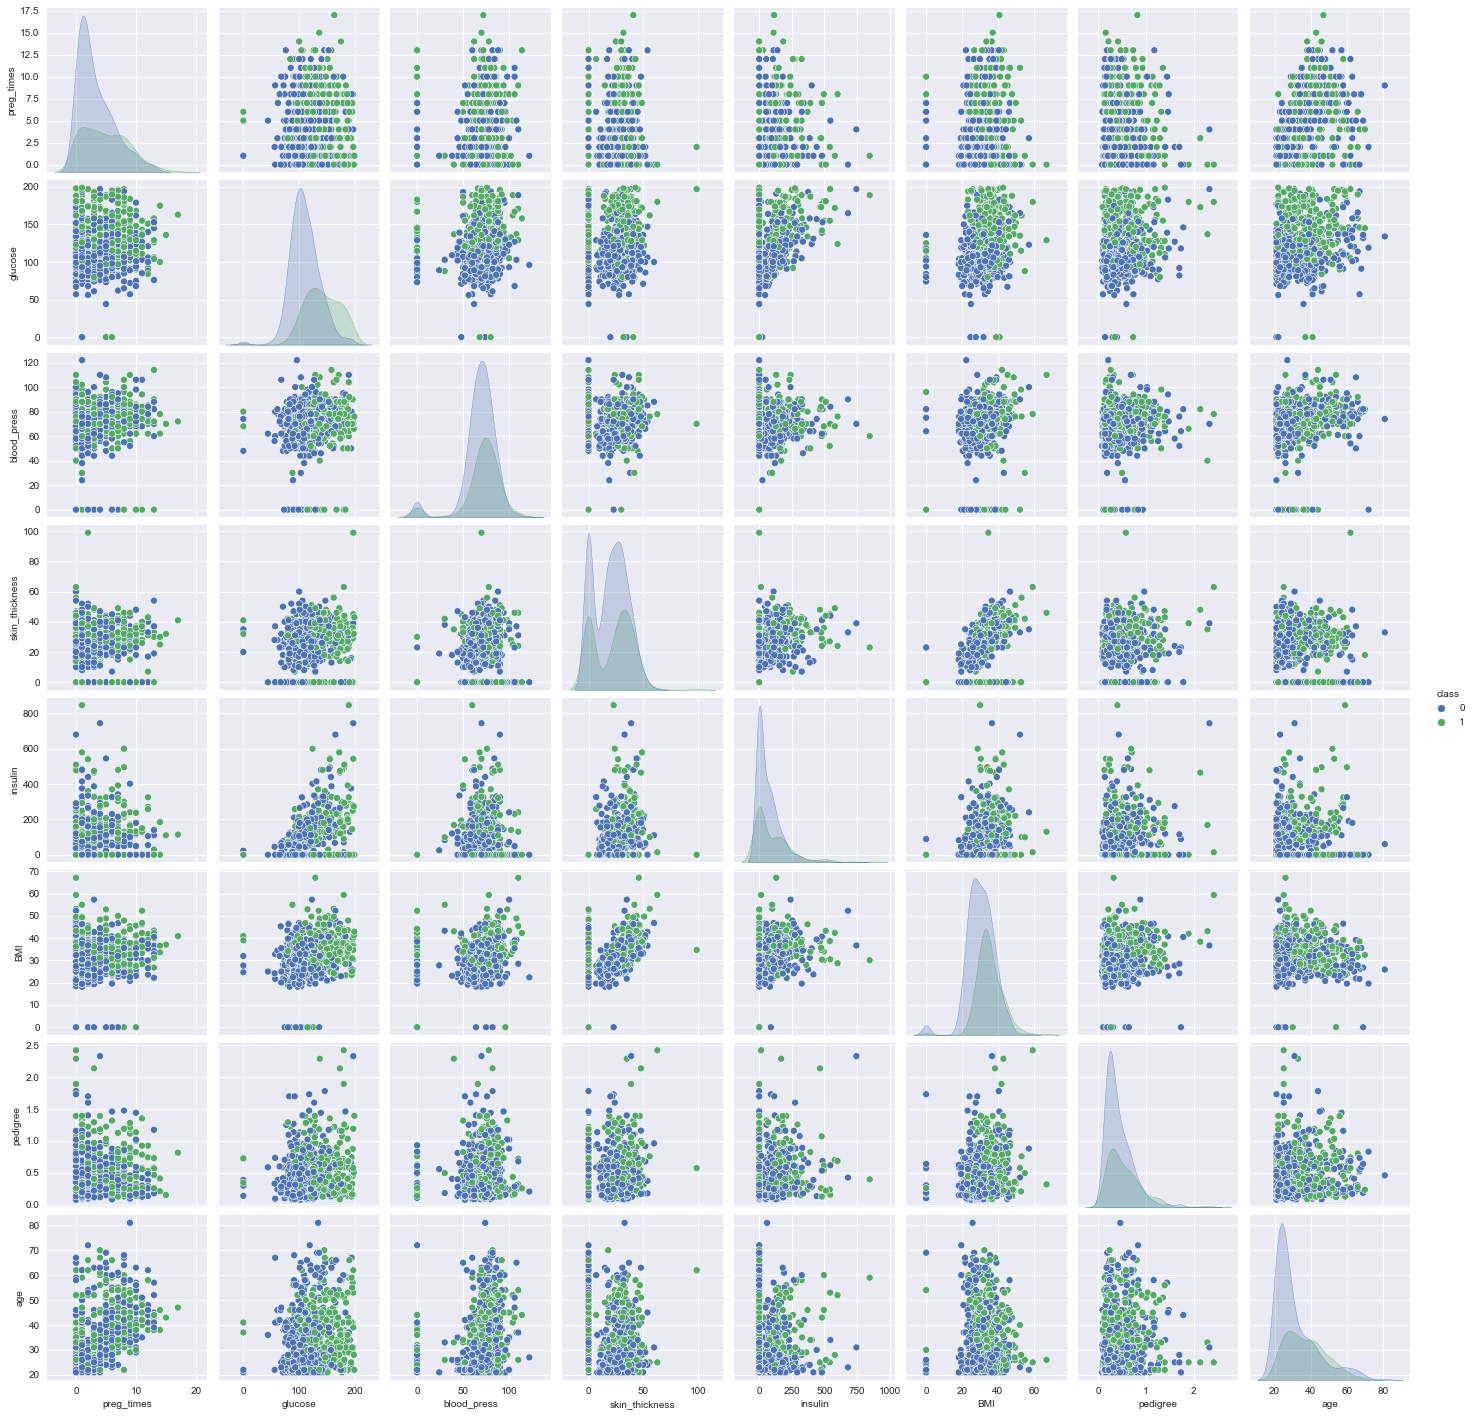

In [23]:
p = sns.pairplot(df_diabetes, hue='class')

### Spill Datasets

In [77]:
# Memisahkan datasets menjadi features dan labels
features = df_diabetes.drop('class', axis=1)
labels = df_diabetes["class"]

In [78]:
print(f"Features data : {features.shape}")
print(f"Labels data   : {labels.shape}")

Features data : (768, 8)
Labels data   : (768,)


In [178]:
# Memabgi data menjadi training data & testing data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1, stratify=labels)

In [179]:
print(f'Data train : {np.unique(y_train)}')
print(f'Data test  : {np.unique(y_test)}')

Data train : [0 1]
Data test  : [0 1]


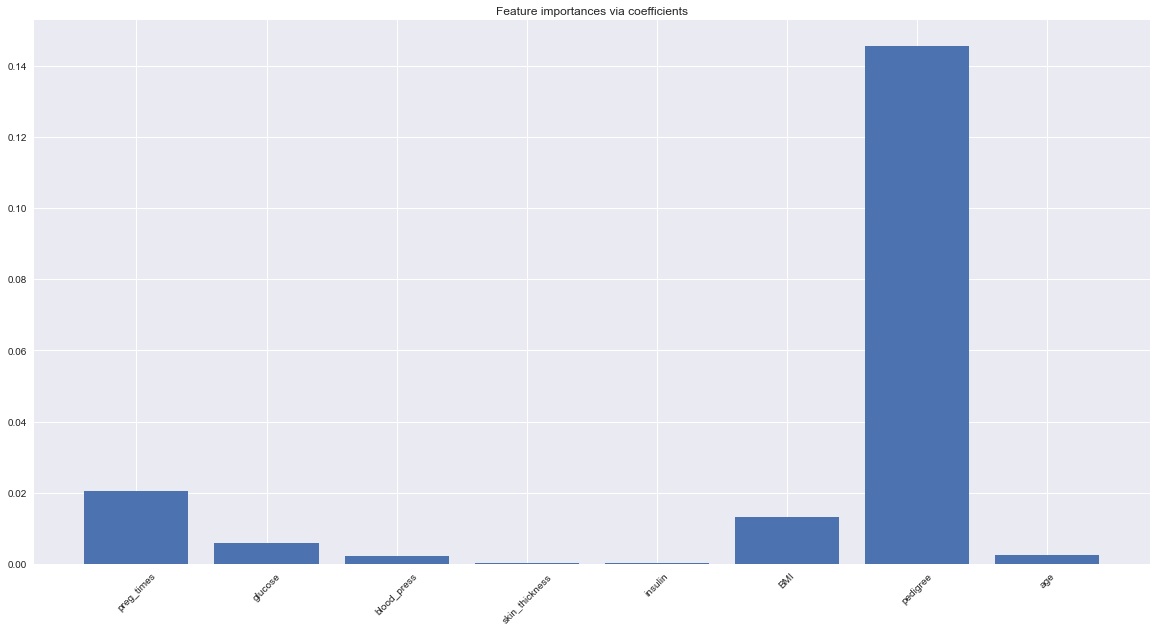

In [180]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV

# Melatih model Ridge Regression dengan menggunakan RidgeCV
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(features, labels)

# Menghitung pentingnya setiap fitur berdasarkan koefisien
importance = np.abs(ridge.coef_)

# Mendapatkan nama fitur
feature_names = features.columns

# Membuat grafik batang untuk menampilkan fitur penting
plt.figure(figsize = (20, 10))
plt.bar(height=importance, x=feature_names)
plt.xticks(rotation = 45)
plt.title("Feature importances via coefficients")
plt.show()

In [181]:
print("Nama Fitur:")
for feature in df_diabetes:
    print(feature)

Nama Fitur:
preg_times
glucose
blood_press
skin_thickness
insulin
BMI
pedigree
age
class


## 3.) Data Modeling

### Define Model

In [182]:
# Load libraries 
from tensorflow.keras.layers import BatchNormalization, Dropout

In [183]:
# Skalakan fitur menggunakan Standardscaller
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
# Convert binary label into one hot encoder format
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test  = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

# Check dimension
y_train.shape, y_test.shape

((614, 2), (154, 2))

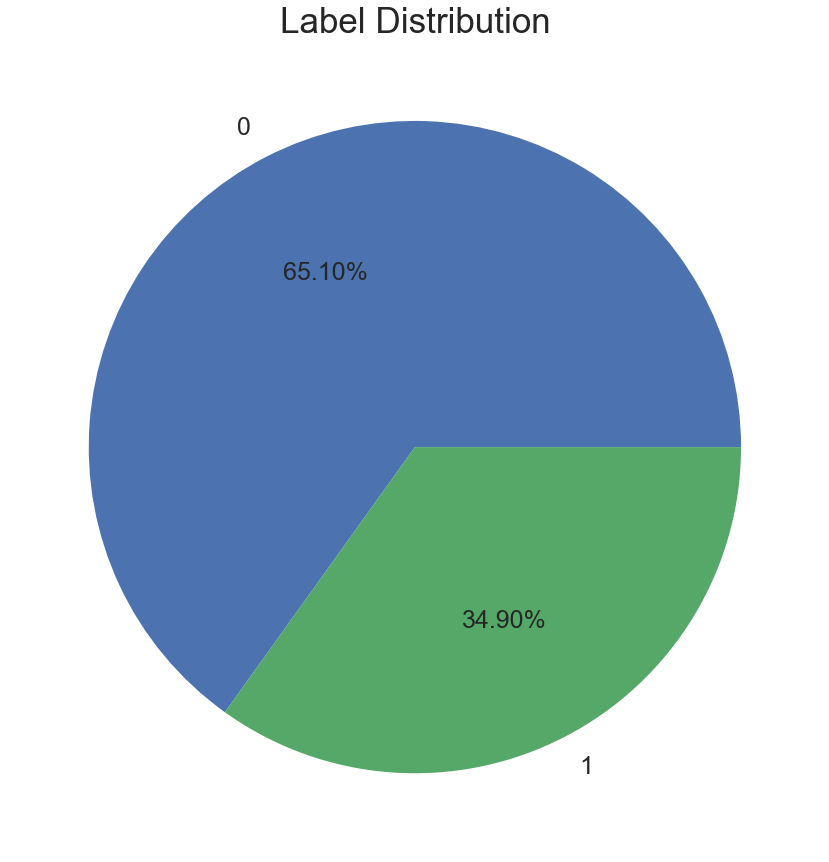

In [186]:
# mengecek persentase label class
ax = df_diabetes["class"].value_counts().plot(kind = "pie", autopct = "%.2f%%", fontsize = 25, figsize = (15, 15))
ax.set_ylabel(None)
ax.set_title("Label Distribution", fontsize = 35);

In [193]:
# menggunakan model sequential dari keras
model = Sequential()

# define layer yang akan digunakan
model.add(Dense(16, input_dim = 8, activation = 'relu')) # Input + 1st Hidden layer
model.add(Dense(24, activation='relu')) # 2nd Hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax')) # Output

In [194]:
# Show model summary
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 16)                144       
                                                                 
 dense_50 (Dense)            (None, 24)                408       
                                                                 
 batch_normalization_6 (Batc  (None, 24)               96        
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 24)                0         
                                                                 
 dense_51 (Dense)            (None, 2)                 50        
                                                                 
Total params: 698
Trainable params: 650
Non-trainable params: 48
______________________________________________________

### Compile Model

In [195]:
# buat optimizer dengan learning rate yang diinginkan
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
optimizer = Adam(learning_rate = learning_rate)

In [196]:
# Compile Model, menentukan loss function, optimizer, metrics untuk di evaluasi
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics = 'accuracy')

### Train the Model

In [197]:
# define callbacks
import gc
from tensorflow.keras.callbacks import Callback, EarlyStopping

class OwnCallbacks(Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get("val_accuracy") > 0.95:
            gc.collect()
            self.model.stop_training = True
            
# define early stopping case
early_stopping = EarlyStopping(monitor = "val_accuracy", patience = 10)

In [198]:
# Training / fit keras model dengan datasets yang ada
history = model.fit(
    X_train, y_train, validation_data = (X_test, y_test), 
    epochs = 1000, batch_size = 16, 
    verbose = 0, callbacks = [OwnCallbacks()]
    )

## 4.) Model Evaluation

In [199]:
# cek history isi model nya
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Result Visualisation

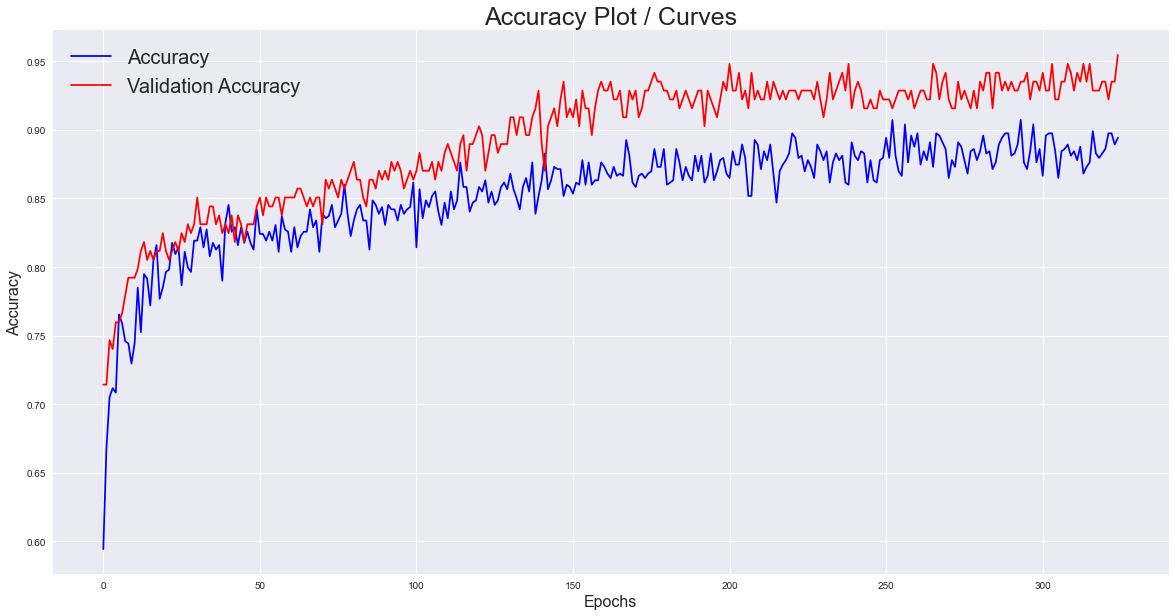

In [200]:
# plot akurasi model per epochs
plt.figure(figsize=(20, 10))
plt.plot(history.history['accuracy'], 'b', label = "Accuracy")
plt.plot(history.history['val_accuracy'], 'r', label = "Validation Accuracy")
plt.legend(loc = "best", fontsize = 20)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Plot / Curves', fontsize = 25)

plt.show()

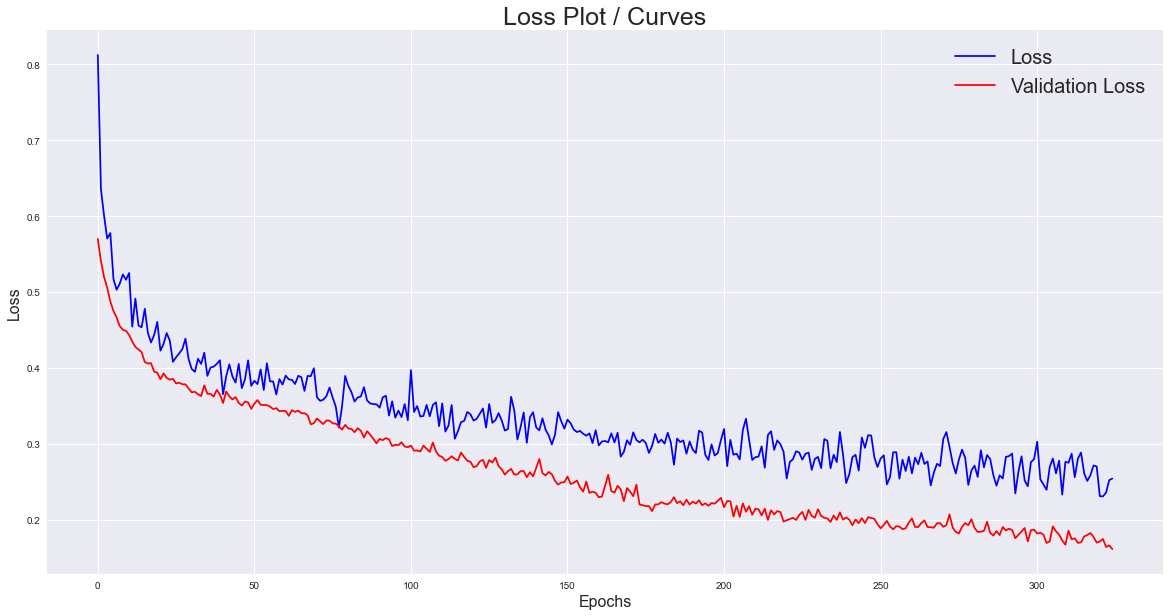

In [201]:
# plot loss model per epochs
plt.figure(figsize=(20, 10))
plt.plot(history.history['loss'], 'b', label = "Loss")
plt.plot(history.history['val_loss'], 'r', label = "Validation Loss")
plt.legend(loc = "best", fontsize = 20)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Plot / Curves', fontsize = 25)
plt.show()

In [202]:
# Evaluasi model pada data test menggunakan akurasi
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Lossnya     : {loss}")
print(f"Accuracy-nya : {accuracy*100:0.0f}")

5/5 [==============================] - 0s 4ms/step - loss: 0.1611 - accuracy: 0.9545
Lossnya     : 0.16106028854846954
Accuracy-nya : 95


In [203]:
#for i in range(len(model.layers)):
#  print(f"Layer ke-{i+1} : \n{model.layers[i].get_config()}")
#  print(f"Layer ke-{i+1} : \n{model.layers[i].get_weights()}")

In [204]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [208]:
# y_test.shape
y_pred

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [212]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test.argmax(axis = 1), y_pred.argmax(axis = 1), labels=[1,0])
print(cm)

5/5 [==============================] - 0s 3ms/step
[[ 47   5]
 [  2 100]]


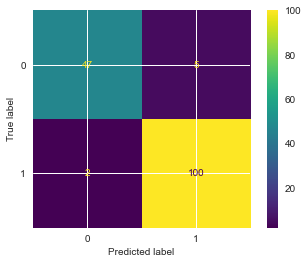

In [213]:
cm_display = ConfusionMatrixDisplay(cm).plot();

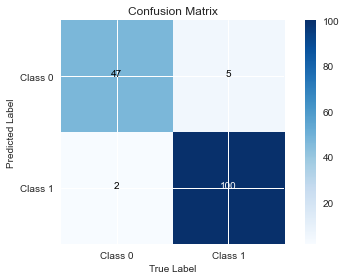

In [214]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# Menampilkan matriks kebingungan
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

classes = ["Class 0", "Class 1"]  # Ganti dengan label kelas yang sesuai
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()

In [216]:
print(classification_report(y_test.argmax(axis = 1), y_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       102
           1       0.96      0.90      0.93        52

    accuracy                           0.95       154
   macro avg       0.96      0.94      0.95       154
weighted avg       0.95      0.95      0.95       154

